# Linear Regression

### regression
- Simple Linear Regression (one independent variable and one dependent variable)
- Multiple Linear Regression (multiple independent variables and one dependent variable)

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as ans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [119]:
# import seaborn as sns
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [121]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [122]:
df.duplicated().sum()

np.int64(1)

In [123]:
df.drop_duplicates(inplace=True)

In [124]:
df.shape

(243, 7)

In [125]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [126]:
df.describe()

,total_bill,tip,size
count,243.000000,243.000000,243.000000
mean,19.813868,3.002387,2.572016
std,8.910071,1.385002,0.952356
min,3.070000,1.000000,1.000000
25%,13.380000,2.000000,2.000000
50%,17.810000,2.920000,2.000000
75%,24.175000,3.575000,3.000000
max,50.810000,10.000000,6.000000


In [127]:
df['sex'].value_counts()

sex
Male      157
Female     86
Name: count, dtype: int64

*male are more then women*

In [128]:
df['smoker'].value_counts()

smoker
No     151
Yes     92
Name: count, dtype: int64

*Non smoker are less then smoker*

In [129]:
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    61
Fri     19
Name: count, dtype: int64

*Sat has the more visitors*

In [130]:
df['time'].value_counts()

time
Dinner    176
Lunch      67
Name: count, dtype: int64

<Axes: xlabel='total_bill', ylabel='tip'>

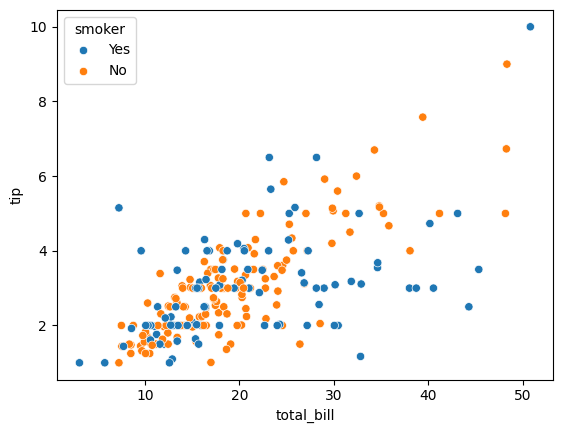

In [131]:
sns.scatterplot(x='total_bill', y='tip', data=df, hue='smoker')

In [132]:
x=df[['total_bill']]
y=df['tip']

x_train, x_test,y_train, y_test = train_test_split(x, y, test_size=0.2)

In [133]:
print(x_train.shape)
print(y_train.shape)

(194, 1)
(194,)


In [134]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [135]:
print(model.coef_)
print(model.intercept_)

print(f'Y= {model.intercept_} + {model.coef_}*X ')


[0.10533564]
0.9255544511087743
Y= 0.9255544511087743 + [0.10533564]*X 


## Model Prediction

In [136]:
y_pred = model.predict(x_test)
y_pred

array([2.08635322, 3.70746874, 3.79911075, 2.40762693, 2.65832575,
       2.84898326, 2.29807786, 3.07966832, 2.25910367, 3.13865628,
       2.57827066, 3.08388174, 2.54561662, 3.13865628, 1.98628436,
       3.97712798, 3.93288701, 4.33842923, 5.07788543, 4.39109705,
       1.53123439, 3.01330686, 2.48241523, 4.12775795, 4.69973048,
       2.32441177, 2.56141696, 3.4620367 , 2.70888686, 4.59228813,
       3.08809517, 2.80263558, 2.33915876, 2.01367163, 5.59192336,
       2.04105889, 2.12427405, 2.61513814, 2.45081454, 2.33915876,
       2.33915876, 1.98628436, 4.59439484, 2.23487647, 2.67201939,
       2.0094582 , 1.97259073, 2.26963724, 2.04527232])

### Evaluate the mdoel

In [137]:
print(f"MSE {mean_squared_error(y_test, y_pred)}")
print(f"R2 {r2_score(y_test, y_pred)}")
print(f"RMSE {np.sqrt(mean_squared_error(y_test, y_pred))}")

MSE 0.9148382565479328
R2 0.48112860494393583
RMSE 0.9564717750921523


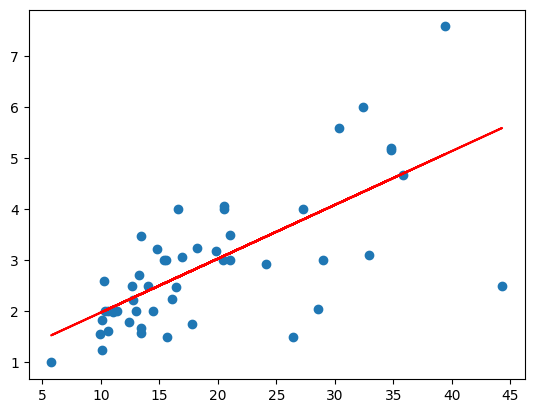

In [138]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='red')


In [139]:
model.predict([[15]])

c:\Users\MR OSMAN\miniconda3\envs\pandas\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.50558907])

# Multi Linear Regression

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
import seaborn as sns
df_tips=sns.load_dataset('tips')

In [4]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
print(df_tips.shape)
print(df_tips.columns)
print(df_tips.isnull().sum())
print(df_tips.duplicated().sum())
print(df_tips.info())

(244, 7)
Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64
1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


In [6]:
# remove duplicate
df_tips.drop_duplicates(inplace=True)

In [7]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
print(df_tips['smoker'].value_counts())
print(df_tips['day'].value_counts())
print(df_tips['time'].value_counts())

smoker
No     151
Yes     92
Name: count, dtype: int64
day
Sat     87
Sun     76
Thur    61
Fri     19
Name: count, dtype: int64
time
Dinner    176
Lunch      67
Name: count, dtype: int64


In [9]:
# convert all the catagorical variable into numerical variable
le = LabelEncoder()
df_tips['smoker_scale'] = le.fit_transform(df_tips['smoker'])
df_tips['day_scale'] = le.fit_transform(df_tips['day'])
df_tips['time_scale'] = le.fit_transform(df_tips['time'])
df_tips['sex_scale'] = le.fit_transform(df_tips['sex'])

In [10]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size,smoker_scale,day_scale,time_scale,sex_scale
0,16.99,1.01,Female,No,Sun,Dinner,2,0,2,0,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,2,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,2,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,2,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,2,0,0


In [11]:
df_tips.drop(columns=['sex','smoker','day','time'],inplace=True)

In [12]:
df_tips.head()

,total_bill,tip,size,smoker_scale,day_scale,time_scale,sex_scale
0,16.99,1.01,2,0,2,0,0
1,10.34,1.66,3,0,2,0,1
2,21.01,3.50,3,0,2,0,1
3,23.68,3.31,2,0,2,0,1
4,24.59,3.61,4,0,2,0,0


In [13]:
df_tips.describe(include='all')

,total_bill,tip,size,smoker_scale,day_scale,time_scale,sex_scale
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,19.813868,3.002387,2.572016,0.378601,1.736626,0.275720,0.646091
std,8.910071,1.385002,0.952356,0.486040,0.925185,0.447799,0.479168
min,3.070000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,13.380000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000
50%,17.810000,2.920000,2.000000,0.000000,2.000000,0.000000,1.000000
75%,24.175000,3.575000,3.000000,1.000000,2.500000,1.000000,1.000000
max,50.810000,10.000000,6.000000,1.000000,3.000000,1.000000,1.000000


<Axes: xlabel='tip', ylabel='Count'>

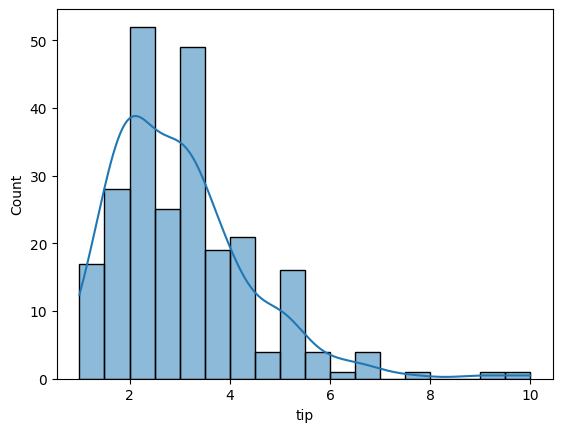

In [14]:
sns.histplot(df_tips['tip'], kde=True)

In [15]:
df_tips.head()

,total_bill,tip,size,smoker_scale,day_scale,time_scale,sex_scale
0,16.99,1.01,2,0,2,0,0
1,10.34,1.66,3,0,2,0,1
2,21.01,3.50,3,0,2,0,1
3,23.68,3.31,2,0,2,0,1
4,24.59,3.61,4,0,2,0,0


In [16]:
x=df_tips.drop('tip', axis=1)
y=df_tips['tip']

In [17]:
print(x.shape)
print(y.shape)

(243, 6)
(243,)


In [18]:
y.value_counts()

tip
2.00    32
3.00    23
4.00    12
2.50    10
5.00    10
        ..
1.47     1
1.17     1
4.67     1
5.92     1
1.75     1
Name: count, Length: 123, dtype: int64

In [19]:
x.head()

,total_bill,size,smoker_scale,day_scale,time_scale,sex_scale
0,16.99,2,0,2,0,0
1,10.34,3,0,2,0,1
2,21.01,3,0,2,0,1
3,23.68,2,0,2,0,1
4,24.59,4,0,2,0,0


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [21]:
print(x_train.shape)
print(y_train.shape)

(194, 6)
(194,)


In [22]:
print(x_test.shape)
print(y_test.shape)

(49, 6)
(49,)


In [23]:
lr = LinearRegression()
lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
print(lr.coef_)
print(lr.intercept_)

[ 0.09799767  0.18188973 -0.24113991 -0.07975372  0.16136336 -0.14161682]
0.8886668381389371


In [25]:
y_pred = lr.predict(x_test)
y_pred

array([2.90272715, 3.12981015, 4.91211601, 3.59512921, 4.86583866,
       3.83140778, 2.66236128, 3.19311238, 2.86337075, 2.97338949,
       4.24898176, 2.4303784 , 4.10384129, 3.3445675 , 2.46419779,
       2.19197249, 1.70128593, 2.72731133, 3.94927875, 1.97326785,
       1.99282902, 3.56376996, 2.69686639, 3.89811175, 2.59599446,
       3.09926103, 2.26088081, 2.99646767, 3.56404374, 2.8535813 ,
       4.24817163, 3.86648092, 2.35850286, 3.29836613, 4.06224765,
       2.80721783, 3.45112815, 5.61512472, 2.21822365, 4.82243786,
       2.56773807, 1.76889416, 2.2090077 , 2.78465015, 4.95158666,
       2.12357989, 2.06103123, 1.86987012, 1.97949527])

In [28]:
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²", r2_score(y_test, y_pred))

MSE 0.8708822526402761
RMSE 0.9332107225274879
R² 0.42652948990861694


In [30]:
lr.predict([[19.50, 3, 1, 3, 1, 1]])

c:\Users\MR OSMAN\miniconda3\envs\pandas\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.88463598])